In [1]:
import librosa
import librosa.display

In [2]:
ret = librosa.load('./Piano_Sonata_no_8_in_C_minor_Pathetique_Op_13_Complete_Performance.mp3',duration=300)



print(ret)

/home/gordon/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(array([0.        , 0.        , 0.        , ..., 0.00073386, 0.00058553,
       0.00017313], dtype=float32), 22050)


In [19]:
amplitudes_carl,sr_carl = librosa.load('./carl_sagan_the_pale_blue_dot.mp3',duration=60)


/home/gordon/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


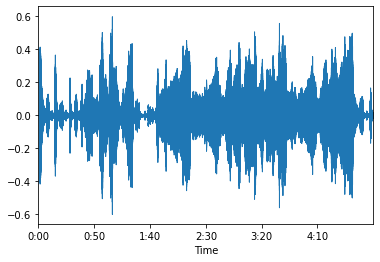

In [3]:
amplitudes,sr = ret
librosa.display.waveplot(amplitudes,sr=sr)

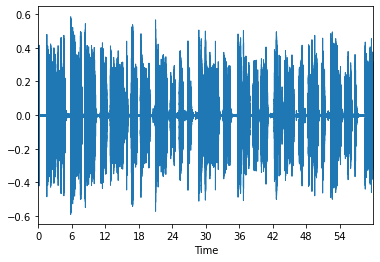

In [20]:
librosa.display.waveplot(amplitudes_carl,sr=sr_carl)

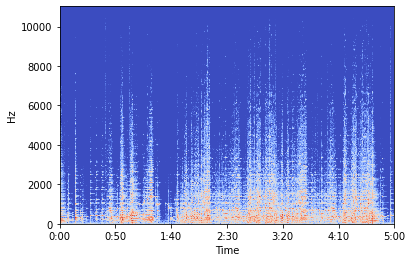

In [12]:
x = librosa.stft(amplitudes)
xdb = librosa.amplitude_to_db(abs(x))
librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')

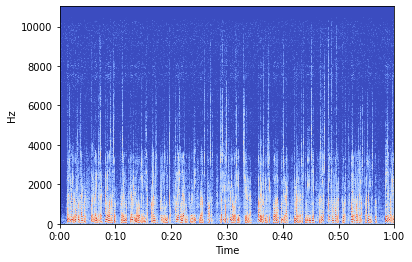

In [21]:
x_carl = librosa.stft(amplitudes_carl)
xdb_carl = librosa.amplitude_to_db(abs(x_carl))
librosa.display.specshow(xdb_carl,sr=sr_carl,x_axis='time',y_axis='hz')

(1, 12920)
[0.         0.         0.         ... 0.00523017 0.00520818 0.00548621]
[0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 2.99932154e+02
 2.99955374e+02 2.99978594e+02]


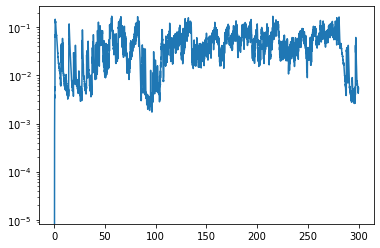

In [18]:
import matplotlib.pyplot as plt
rms = librosa.feature.rms(amplitudes,center=True)

print(rms.shape)
print(rms[0])
times = librosa.times_like(rms) # 0 - 300 
print(times)
plt.semilogy(times,rms[0],label="RMS Energy")
plt.show()




(20, 12920)


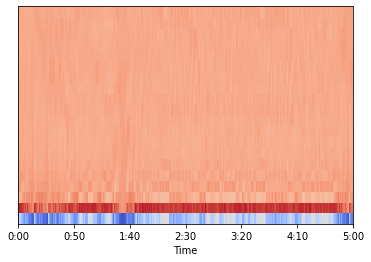

In [27]:
mfcc_features = librosa.feature.mfcc(amplitudes,sr=sr, n_mfcc=20)

print(mfcc_features.shape)
# (20,12920) batch 32 -> batch(20,32)
librosa.display.specshow(mfcc_features,sr=sr,x_axis='time')



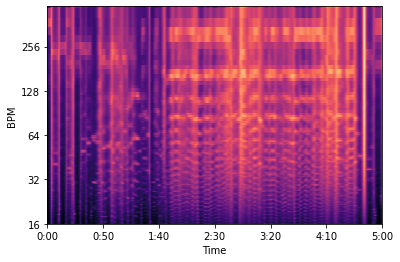

In [32]:
tempogram = librosa.feature.tempogram(amplitudes, sr=sr)
librosa.display.specshow(tempogram,sr=sr,x_axis='time', y_axis="tempo")

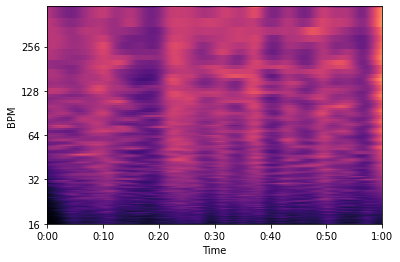

In [33]:
tempogram_carl = librosa.feature.tempogram(amplitudes_carl, sr=sr_carl)
librosa.display.specshow(tempogram_carl,sr=sr_carl,x_axis='time', y_axis="tempo")

(12, 12920)

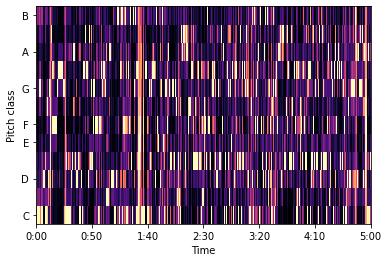

In [36]:
chromagram = librosa.feature.chroma_stft(amplitudes,sr=sr)
librosa.display.specshow(chromagram,sr=sr, x_axis = 'time', y_axis='chroma')
chromagram.shape

In [41]:
amplitudes_carl_cut = amplitudes_carl[:(30 * sr_carl)]
amplitudes_carl_cut.shape


(661500,)

In [42]:
import soundfile as sf

sf.write('./carl_sagan_half_min.wav',amplitudes_carl_cut,samplerate=sr_carl)

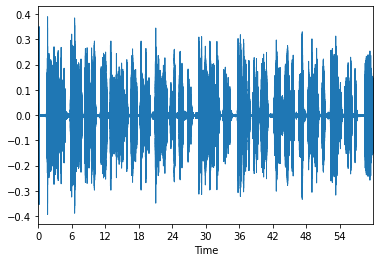

In [43]:
shifted_carl = librosa.effects.pitch_shift(amplitudes_carl,sr=sr_carl, n_steps=3.0)

librosa.display.waveplot(shifted_carl,sr=sr_carl)

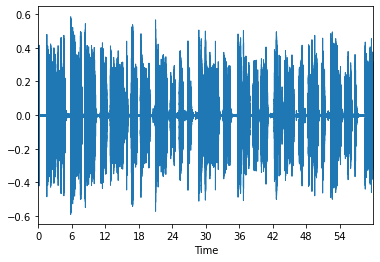

In [44]:

librosa.display.waveplot(amplitudes_carl,sr=sr_carl)

In [47]:
sf.write('shifted_pitch.wav',shifted_carl,samplerate=sr_carl)

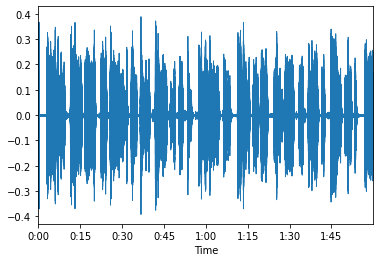

In [50]:
time_stretched = librosa.effects.time_stretch(amplitudes_carl,0.5)
librosa.display.waveplot(time_stretched,sr=sr_carl)

sf.write('slow_down.wav',time_stretched,samplerate=sr_carl)


In [ ]:
import numpy as np

noise = np.random.randn(len(amplitudes_carl))
noise_factor = 0.8

# Superposition
noised_speech = amplitudes_carl + noise * noise_factor


librosa.display.waveplot(noised_speech,sr=sr_carl)